# Temat testów
### Czy istnieje istotna statystycznie różnica w czasie odpowiedzi w zależności od trudności zadania? 

In [1]:
import pandas as pd

from functions.set_preparations import prepare_row
from functions.tests import conduct_test_for_gaussian_variables_for_many, conduct_test_for_no_gaussian_variables_for_many, conduct_normality_test_for_many, conduct_normality_test, conduct_anova_test, conduct_kruskal_wallis_test, conduct_homogeneity_var_test
from functions.plots import create_scatterWithregression_and_residuals_plots, create_categorical_time_plot, create_histogram, create_histogram_for_many

In [2]:
df_corr = pd.read_csv('/Users/martasolarz/Studies/Thesis/data/correctness.csv',
    usecols=['ID', '1a_trud', '1b_trud', '2a_trud', '2b_trud', '3a_trud', '3b_trud', 'Trud_all']
)

df_corr = df_corr[df_corr.ID != 6] # odrzucony uczestnik ze względu na metryki eye trackingowe

a = df_corr[['1a_trud', '2a_trud', '3a_trud']]
b = df_corr[['1b_trud', '2b_trud', '3b_trud']]
df_corr['SumTrud_a'] = a.apply(lambda x: x.sum(), axis=1)
df_corr['SumTrud_b'] = b.apply(lambda x: x.sum(), axis=1)
gr1 = df_corr[['1a_trud', '1b_trud']]
gr2 = df_corr[['2a_trud', '2b_trud']]
gr3 = df_corr[['3a_trud', '3b_trud']]
df_corr['SumTrud_1'] = gr1.apply(lambda x: x.sum(), axis=1)
df_corr['SumTrud_2'] = gr2.apply(lambda x: x.sum(), axis=1)
df_corr['SumTrud_3'] = gr3.apply(lambda x: x.sum(), axis=1)

df_time =  pd.read_csv('/Users/martasolarz/Studies/Thesis/data/metrics/times.csv',
    usecols=['ID', 'Duration_1a', 'Duration_1b', 'Duration_2a', 'Duration_2b', 'Duration_3a', 'Duration_3b']
)

df_time['Sum_all'] = df_time.apply(lambda x: x.sum(), axis=1)
a = df_time[['Duration_1a', 'Duration_2a', 'Duration_3a']]
b = df_time[['Duration_1b', 'Duration_2b', 'Duration_3b']]
df_time['Sum_a'] = a.apply(lambda x: x.sum(), axis=1)
df_time['Sum_b'] = b.apply(lambda x: x.sum(), axis=1)
gr1 = df_time[['Duration_1a', 'Duration_1b']]
gr2 = df_time[['Duration_2a', 'Duration_2b']]
gr3 = df_time[['Duration_3a', 'Duration_3b']]
df_time['Sum_1'] = gr1.apply(lambda x: x.sum(), axis=1)
df_time['Sum_2'] = gr2.apply(lambda x: x.sum(), axis=1)
df_time['Sum_3'] = gr3.apply(lambda x: x.sum(), axis=1)

df_merge = df_corr.merge(df_time, on='ID')
df_merge.head()

,ID,1a_trud,1b_trud,2a_trud,2b_trud,3a_trud,3b_trud,Trud_all,SumTrud_a,SumTrud_b,...,Duration_2a,Duration_2b,Duration_3a,Duration_3b,Sum_all,Sum_a,Sum_b,Sum_1,Sum_2,Sum_3
0,1,3,1,4,3,4,4,19,11,8,...,54481,58697,56314,63897,276921,138810,138110,43531,113178,120211
1,2,1,2,3,1,2,4,13,6,7,...,42248,85329,47948,129427,459647,156426,303219,154693,127577,177375
2,3,2,1,3,1,1,1,9,6,3,...,45165,32732,8000,61197,299890,121995,177892,152793,77897,69197
3,4,3,2,2,1,3,5,16,8,8,...,12449,37715,60980,101795,337437,119477,217956,124494,50164,162775
4,5,4,2,3,2,3,3,17,10,7,...,55931,22132,34898,62930,271458,158809,112644,95562,78063,97828


**H0:** Nie ma istotnej statystycznie zależności między czasem odpowiedzi a trudnością zadania.

**H1:** Istnieje istotna statystycznie zależność między czasem odpowiedzi a trudnością zadania.

**Poziom istotności:** $\alpha=0.05$

Mamy do czynienia ze zmienną zależną ciągłą (czas) i dyskretną niezależną (trudność), zatem stosujemy flow:

- Sprawdzenie normalności rozkładu: test Shapiro-Wilka -> jeśli normalny, sprawdzenie homogeniczności wariancji: test Levene'a -> jeśli spełniona, stosujemy test ANOVA. 
- Jeśli brak rozkładu normalnego lub brak homogeniczności wariancji -> stosujemy test nieparametryczny: Kruskala-Wallisa.

In [7]:
ALPHA = 0.05

#### Zsumowane wszystkie grafiki

Stats: 0.9428179264068604
P-value: 0.04306798800826073
Rozkład jest różny od normalnego.


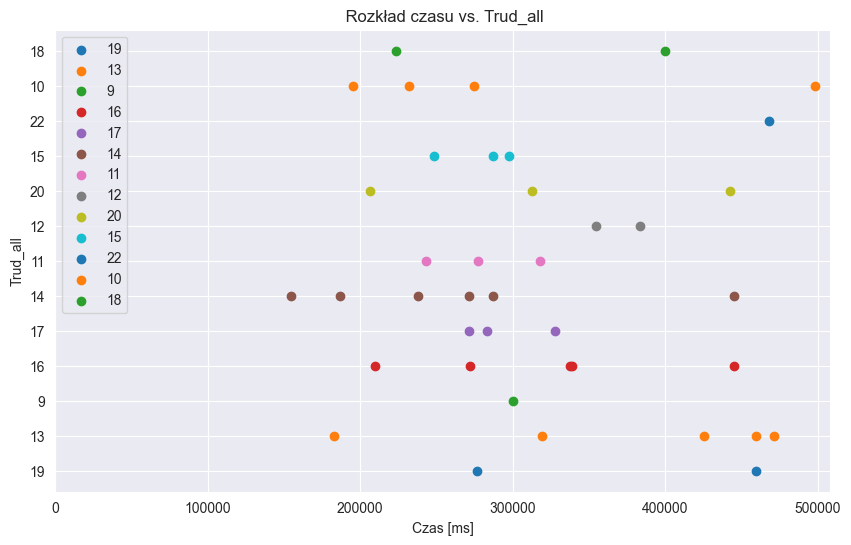

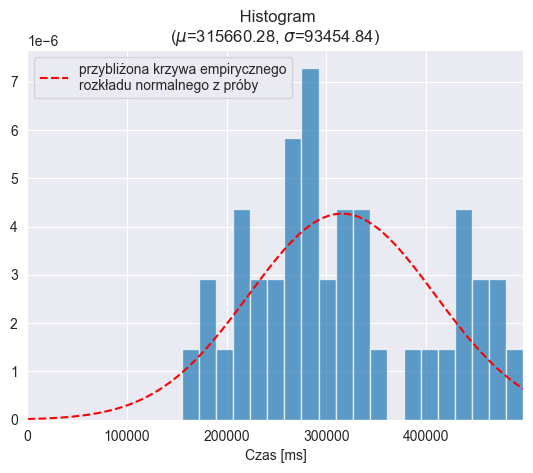

In [8]:
conduct_normality_test(df_merge['Sum_all'], ALPHA)
create_categorical_time_plot(df_merge, 'Sum_all', 'Czas [ms]', 'Trud_all', '')
create_histogram(df_merge, '', 'Sum_all', 'Czas [ms]')

In [9]:
conduct_kruskal_wallis_test(df_merge, ALPHA, 'Sum_all', 'Trud_all')

H: 8.966463414634177
p-value: 0.7057922096544922
Brak podstaw do odrzucenia H0.


#### Zsumowane grafiki A, B

Stats: 0.9695298671722412
P-value: 0.3477451503276825
Dane mają rozkład normalny.


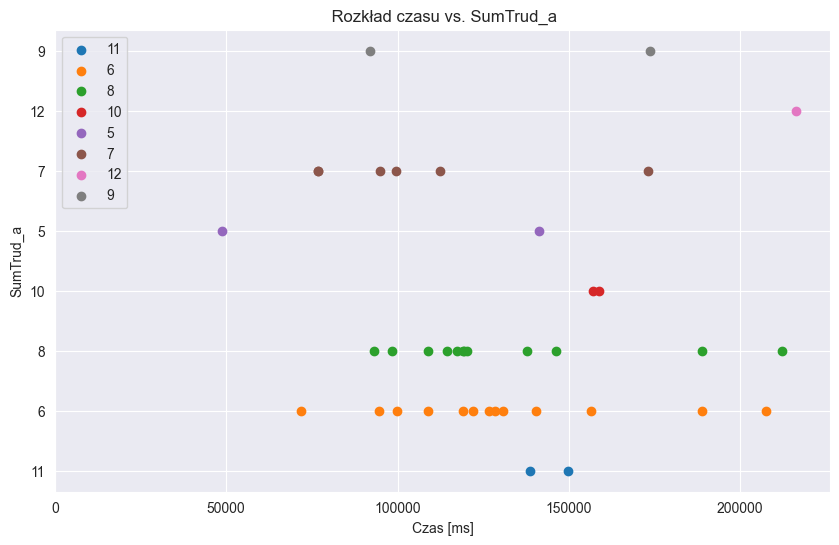

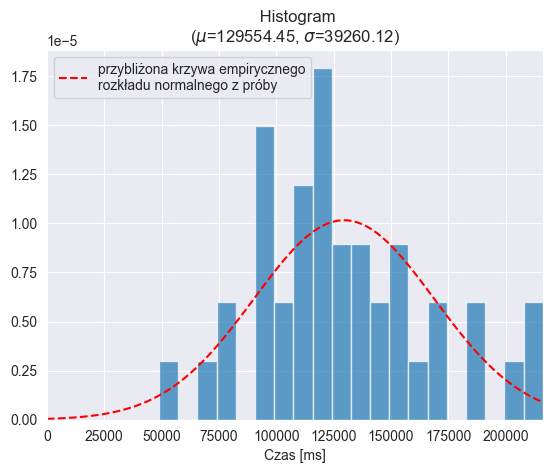

In [10]:
conduct_normality_test(df_merge['Sum_a'], ALPHA)
create_categorical_time_plot(df_merge, 'Sum_a', 'Czas [ms]', 'SumTrud_a', '')
create_histogram(df_merge, '', 'Sum_a', 'Czas [ms]')

In [11]:
conduct_homogeneity_var_test(df_merge, ALPHA, 'Sum_a', 'SumTrud_a', is_single=True)

W: 0.8496269655058203
p-value: 0.5555150604715042
Brak podstaw do odrzucenia H0.


In [12]:
conduct_anova_test(df_merge, ALPHA, 'Sum_a', 'SumTrud_a')

F-value: 1.5824856041222968
p-value: 0.17639199821276674
Brak podstaw do odrzucenia H0.


Stats: 0.9566497802734375
P-value: 0.12853074073791504
Dane mają rozkład normalny.


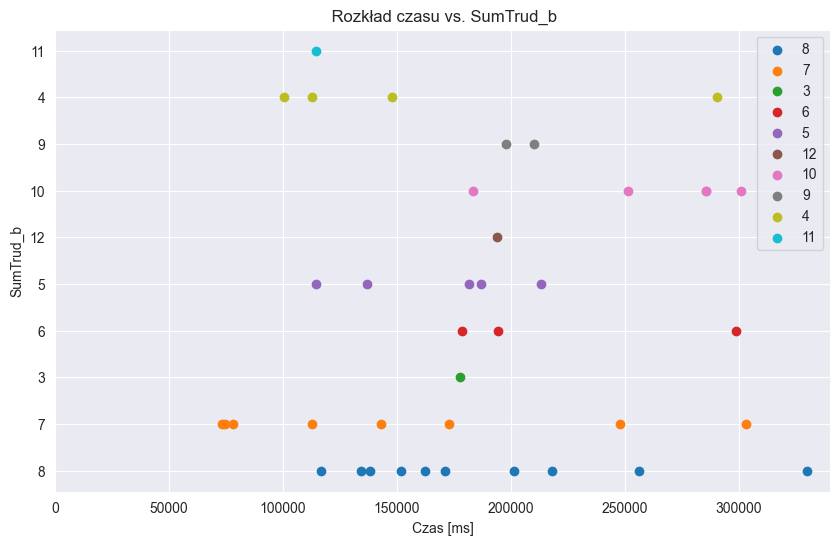

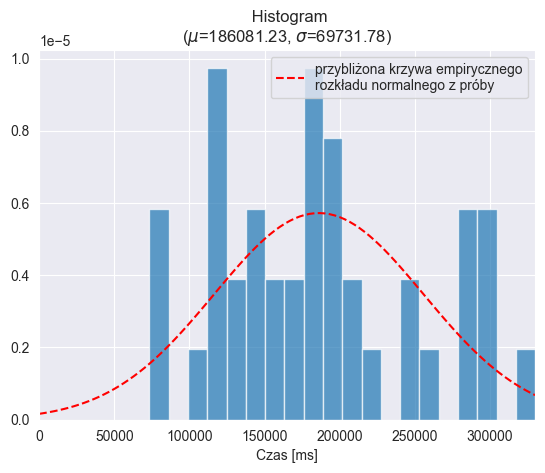

In [13]:
conduct_normality_test(df_merge['Sum_b'], ALPHA)
create_categorical_time_plot(df_merge, 'Sum_b', 'Czas [ms]', 'SumTrud_b', '')
create_histogram(df_merge, '', 'Sum_b', 'Czas [ms]')

In [14]:
conduct_homogeneity_var_test(df_merge, ALPHA, 'Sum_b', 'SumTrud_b', is_single=True)

W: 0.6854582519311369
p-value: 0.7160229157331812
Brak podstaw do odrzucenia H0.


In [15]:
conduct_anova_test(df_merge, ALPHA, 'Sum_b', 'SumTrud_b')

F-value: 1.2789436591841992
p-value: 0.2884496086850472
Brak podstaw do odrzucenia H0.


#### Zsumowane grafiki 1,2,3

Stats: 0.9734835624694824
P-value: 0.46059495210647583
Dane mają rozkład normalny.


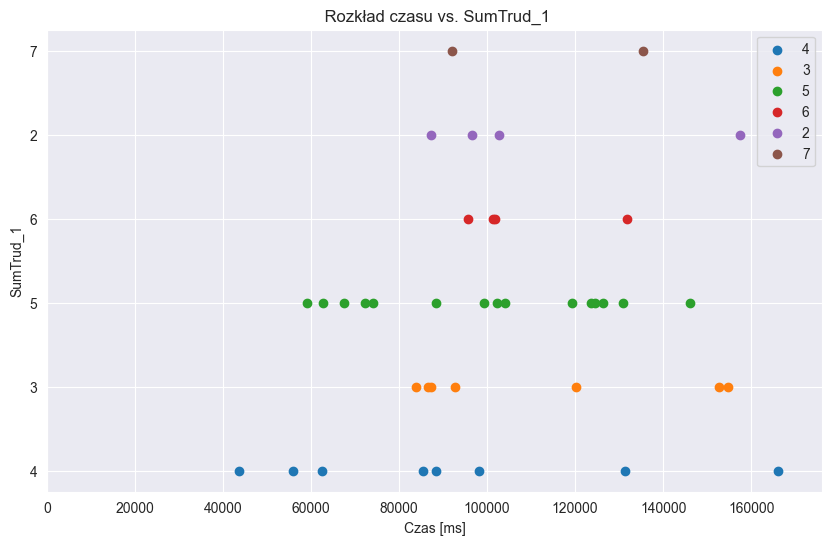

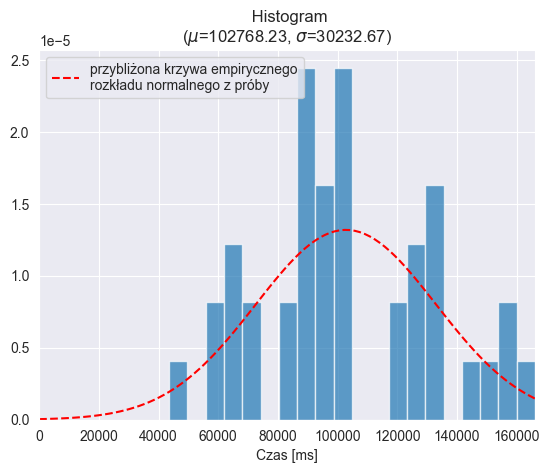

In [16]:
conduct_normality_test(df_merge['Sum_1'], ALPHA)
create_categorical_time_plot(df_merge, 'Sum_1', 'Czas [ms]', 'SumTrud_1', '')
create_histogram(df_merge, '', 'Sum_1', 'Czas [ms]')

In [17]:
conduct_homogeneity_var_test(df_merge, ALPHA, 'Sum_1', 'SumTrud_1', is_single=True)

W: 0.5585792752978603
p-value: 0.7308178529311274
Brak podstaw do odrzucenia H0.


In [18]:
conduct_anova_test(df_merge, ALPHA, 'Sum_1', 'SumTrud_1')

F-value: 0.4558810497802306
p-value: 0.8060526902971114
Brak podstaw do odrzucenia H0.


Stats: 0.954514741897583
P-value: 0.10850125551223755
Dane mają rozkład normalny.


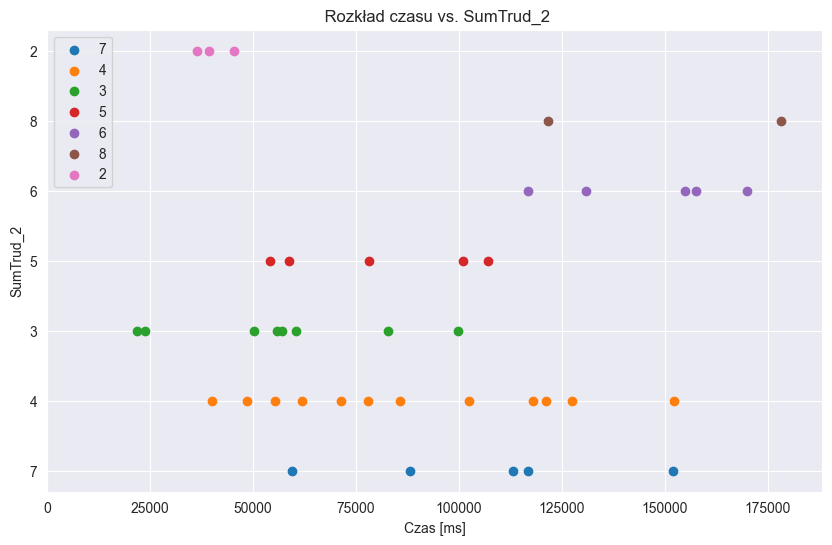

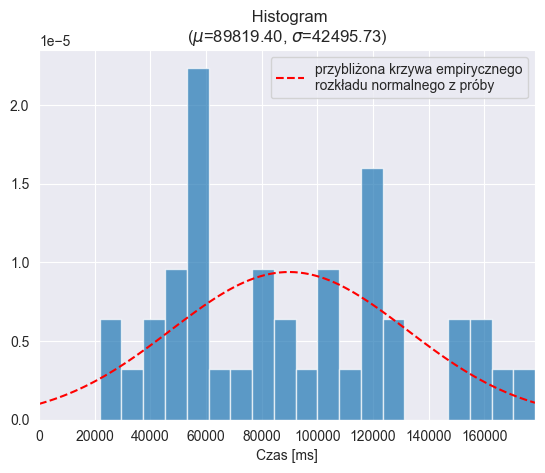

In [19]:
conduct_normality_test(df_merge['Sum_2'], ALPHA)
create_categorical_time_plot(df_merge, 'Sum_2', 'Czas [ms]', 'SumTrud_2', '')
create_histogram(df_merge, '', 'Sum_2', 'Czas [ms]')

In [20]:
conduct_homogeneity_var_test(df_merge, ALPHA, 'Sum_2', 'SumTrud_2', is_single=True)

W: 1.19112284283388
p-value: 0.3351999876015826
Brak podstaw do odrzucenia H0.


In [21]:
conduct_anova_test(df_merge, ALPHA, 'Sum_2', 'SumTrud_2')

F-value: 7.7085328441603025
p-value: 3.1521173126116374e-05
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.


Stats: 0.9476866722106934
P-value: 0.0631483718752861
Dane mają rozkład normalny.


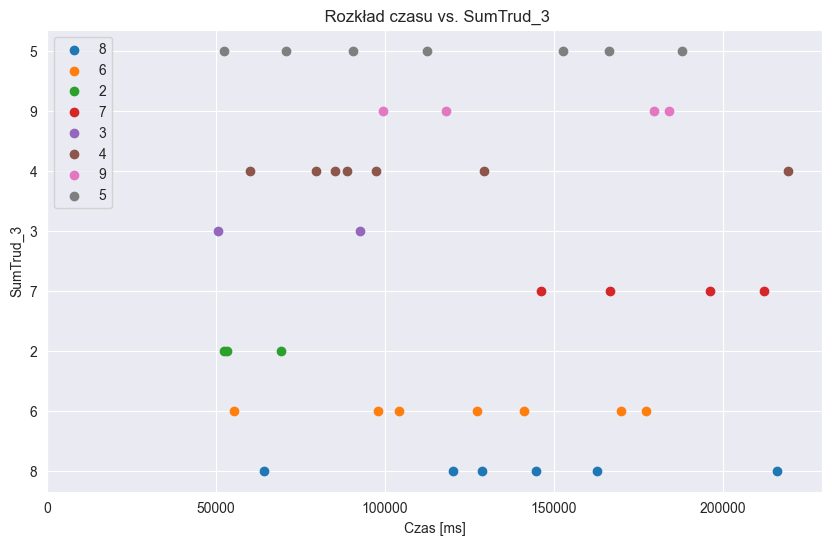

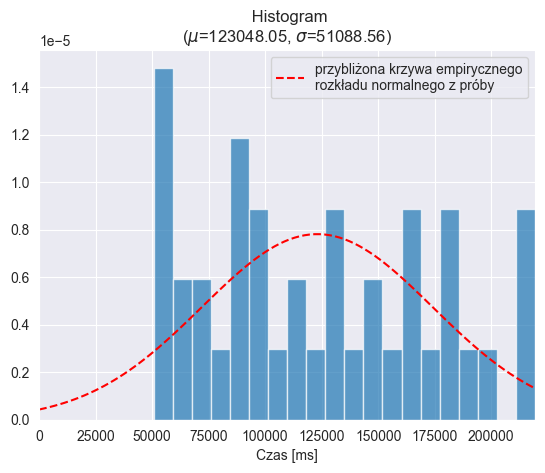

In [22]:
conduct_normality_test(df_merge['Sum_3'], ALPHA)
create_categorical_time_plot(df_merge, 'Sum_3', 'Czas [ms]', 'SumTrud_3', '')
create_histogram(df_merge, '', 'Sum_3', 'Czas [ms]')

In [23]:
conduct_homogeneity_var_test(df_merge, ALPHA, 'Sum_3', 'SumTrud_3', is_single=True)

W: 0.603200414159673
p-value: 0.7486744730348531
Brak podstaw do odrzucenia H0.


In [24]:
conduct_anova_test(df_merge, ALPHA, 'Sum_3', 'SumTrud_3')

F-value: 2.518553617856031
p-value: 0.03502910692607317
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.


#### Wszystkie grafiki - zagregowane w kolumnach

In [25]:
trud = []
for col in df_merge.columns.tolist():
    if col.endswith('trud'):
        trud.append(df_merge[col])

czas = []
for col in df_merge.columns.tolist():
    if col.startswith('Duration'):
        czas.append(df_merge[col])
        
czas_row = prepare_row(czas)
trud_row = prepare_row(trud)

df = pd.DataFrame({'czas': czas_row, 'trudnosc': trud_row})

conduct_normality_test(df['czas'], ALPHA)

Stats: 0.9394290447235107
P-value: 2.1106965064632277e-08
Rozkład jest różny od normalnego.


H: 55.967632527964874
p-value: 2.036754018702941e-11
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.


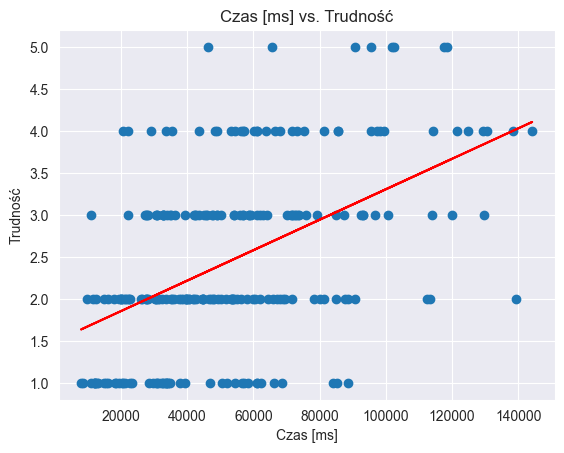

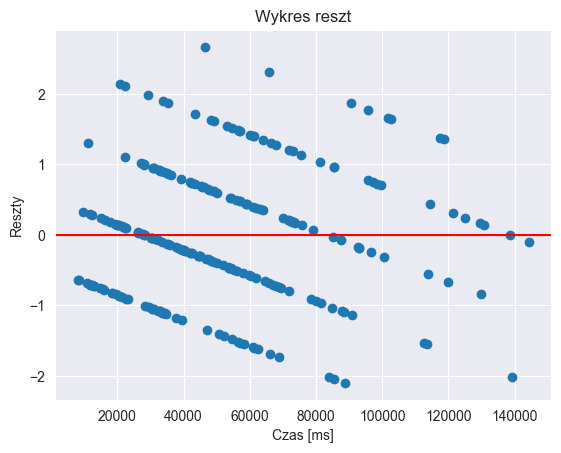

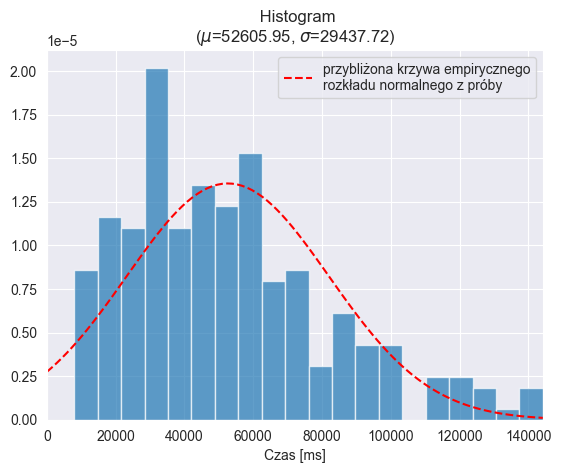

In [26]:
conduct_kruskal_wallis_test(df, ALPHA, 'czas', 'trudnosc')
create_scatterWithregression_and_residuals_plots(df, 'czas', 'trudnosc', 'Czas [ms]', 'Trudność')
create_histogram(df, '', 'czas', 'Czas [ms]')

#### Grafiki A - zagregowane w kolumnach

In [27]:
czas = []
for col in df_merge.columns.tolist():
    if col.startswith('Duration') and col.endswith('a'):
        czas.append(df_merge[col])
        
trud = []
for col in df_merge.columns.tolist():
    if col.endswith('a_trud'):
        trud.append(df_merge[col])

czas_row = prepare_row(czas)
trud_row = prepare_row(trud)

df = pd.DataFrame({'czas': czas_row, 'trudnosc': trud_row})

conduct_normality_test(df['czas'], ALPHA)

Stats: 0.9633676409721375
P-value: 0.0023812607396394014
Rozkład jest różny od normalnego.


H: 28.581302901540827
p-value: 9.507687981637712e-06
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.


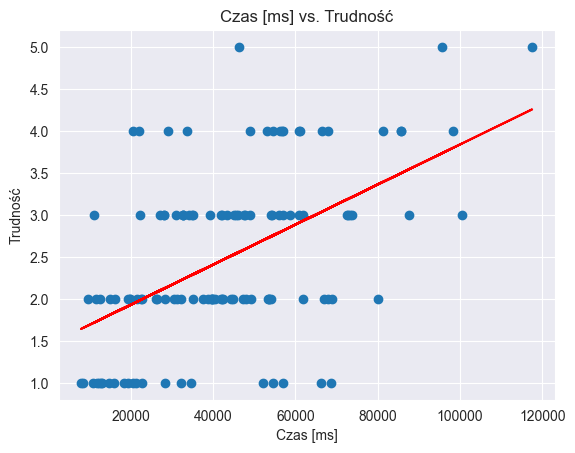

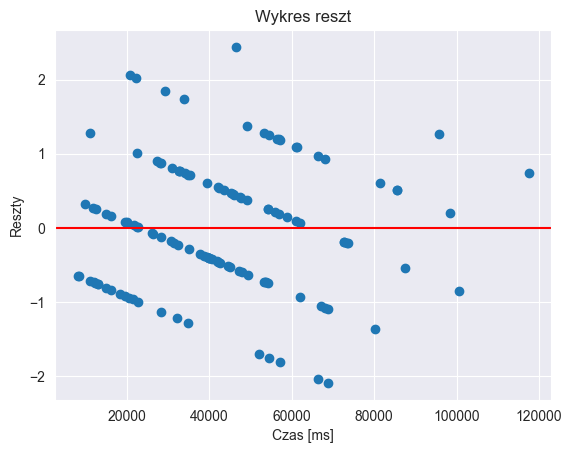

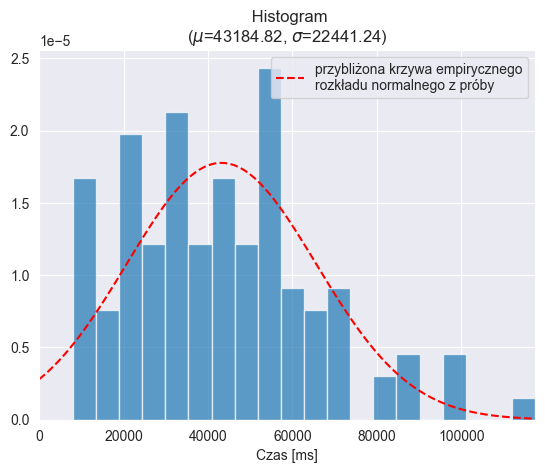

In [28]:
conduct_kruskal_wallis_test(df, ALPHA, 'czas', 'trudnosc')
create_scatterWithregression_and_residuals_plots(df, 'czas', 'trudnosc', 'Czas [ms]', 'Trudność')
create_histogram(df, '', 'czas', 'Czas [ms]')

#### Grafiki B - zagregowane w kolumnie

In [29]:
czas = []
for col in df_merge.columns.tolist():
    if col.startswith('Duration') and col.endswith('b'):
        czas.append(df_merge[col])
        
trud = []
for col in df_merge.columns.tolist():
    if col.endswith('b_trud'):
        trud.append(df_merge[col])

czas_row = prepare_row(czas)
trud_row = prepare_row(trud)

df = pd.DataFrame({'czas': czas_row, 'trudnosc': trud_row})

conduct_normality_test(df['czas'], ALPHA)

Stats: 0.9449341893196106
P-value: 9.35385687625967e-05
Rozkład jest różny od normalnego.


H: 36.092067445706306
p-value: 2.7702035589249966e-07
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.


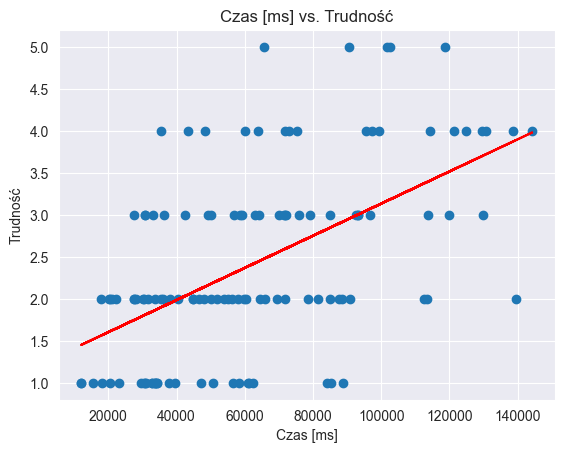

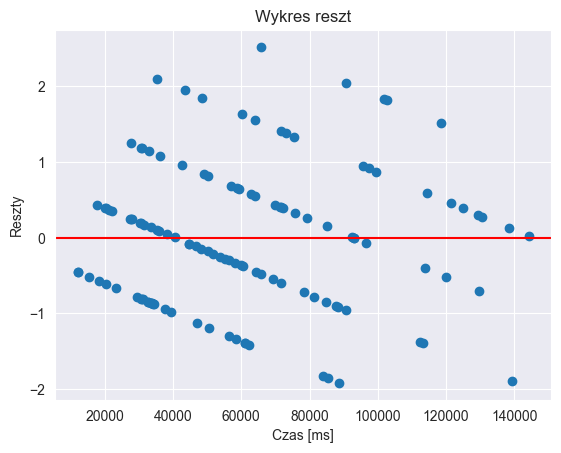

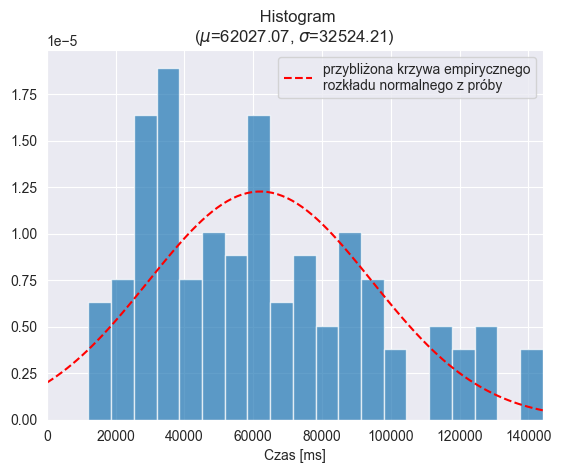

In [30]:
conduct_kruskal_wallis_test(df, ALPHA, 'czas', 'trudnosc')
create_scatterWithregression_and_residuals_plots(df, 'czas', 'trudnosc', 'Czas [ms]', 'Trudność')
create_histogram(df, '', 'czas', 'Czas [ms]')

#### Grafiki 1,2,3 - zagregowane w kolumnie

-> 1

In [31]:
czas = []
for col in df_merge.columns.tolist():
    if col.startswith('Duration_1'):
        czas.append(df_merge[col])

trud = []
for col in df_merge.columns.tolist():
    if col.startswith('1') and col.endswith('_trud'):
        trud.append(df_merge[col])

czas_row = prepare_row(czas)
trud_row = prepare_row(trud)

df = pd.DataFrame({'czas': czas_row, 'trudnosc': trud_row})

conduct_normality_test(df['czas'], ALPHA)

Stats: 0.9487757682800293
P-value: 0.002935204654932022
Rozkład jest różny od normalnego.


H: 9.535284591951267
p-value: 0.0490272548941204
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.


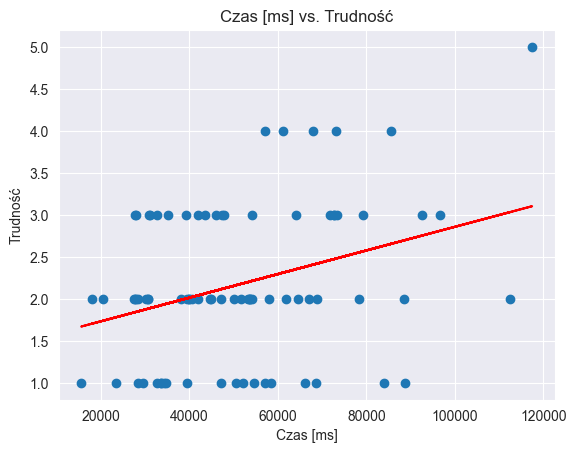

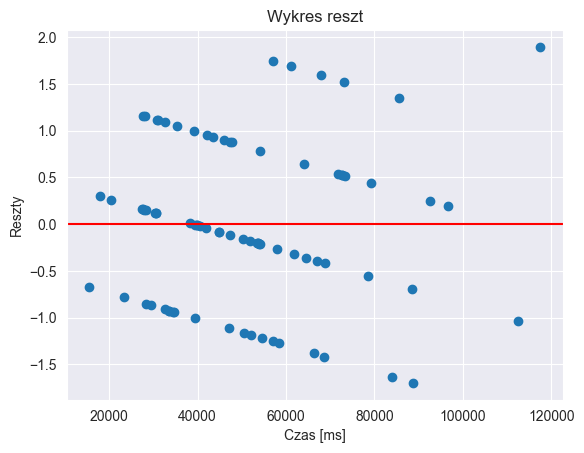

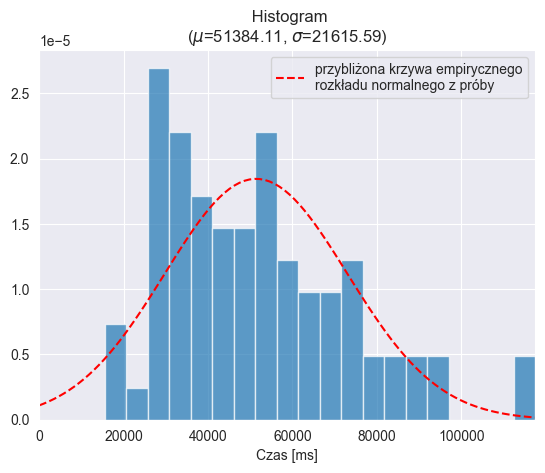

In [32]:
conduct_kruskal_wallis_test(df, ALPHA, 'czas', 'trudnosc')
create_scatterWithregression_and_residuals_plots(df, 'czas', 'trudnosc', 'Czas [ms]', 'Trudność')
create_histogram(df, '', 'czas', 'Czas [ms]')

-> 2

In [33]:
czas = []
for col in df_merge.columns.tolist():
    if col.startswith('Duration_2'):
        czas.append(df_merge[col])

trud = []
for col in df_merge.columns.tolist():
    if col.startswith('2') and col.endswith('_trud'):
        trud.append(df_merge[col])

czas_row = prepare_row(czas)
trud_row = prepare_row(trud)

df = pd.DataFrame({'czas': czas_row, 'trudnosc': trud_row})

conduct_normality_test(df['czas'], ALPHA)

Stats: 0.9244557619094849
P-value: 0.00015536413411609828
Rozkład jest różny od normalnego.


H: 21.18016593933101
p-value: 0.00029165669378083443
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.


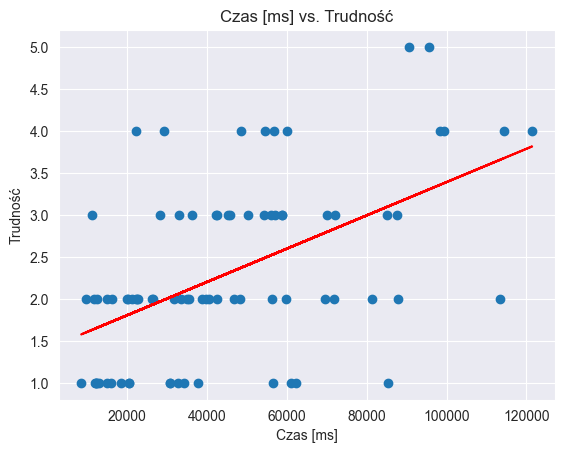

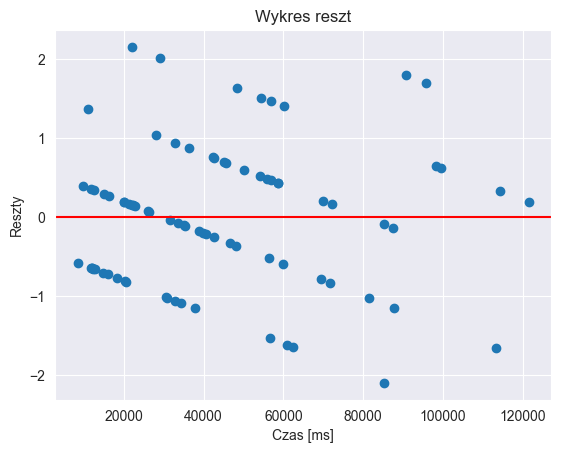

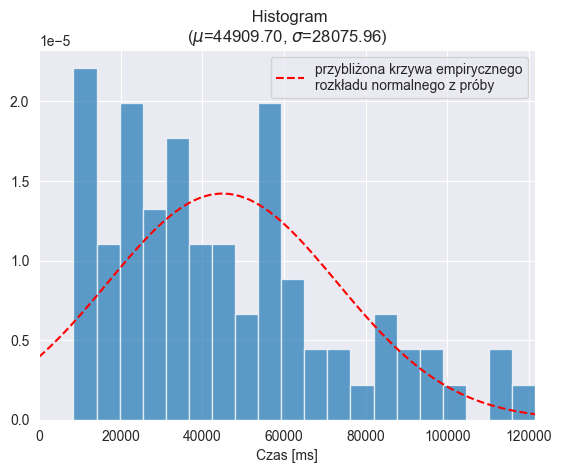

In [34]:
conduct_kruskal_wallis_test(df, ALPHA, 'czas', 'trudnosc')
create_scatterWithregression_and_residuals_plots(df, 'czas', 'trudnosc', 'Czas [ms]', 'Trudność')
create_histogram(df, '', 'czas', 'Czas [ms]')

-> 3

In [35]:
czas = []
for col in df_merge.columns.tolist():
    if col.startswith('Duration_3'):
        czas.append(df_merge[col])

trud = []
for col in df_merge.columns.tolist():
    if col.startswith('3') and col.endswith('_trud'):
        trud.append(df_merge[col])

czas_row = prepare_row(czas)
trud_row = prepare_row(trud)

df = pd.DataFrame({'czas': czas_row, 'trudnosc': trud_row})

conduct_normality_test(df['czas'], ALPHA)

Stats: 0.9390817880630493
P-value: 0.0008601663284935057
Rozkład jest różny od normalnego.


H: 25.490969093397517
p-value: 4.007434623559969e-05
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.


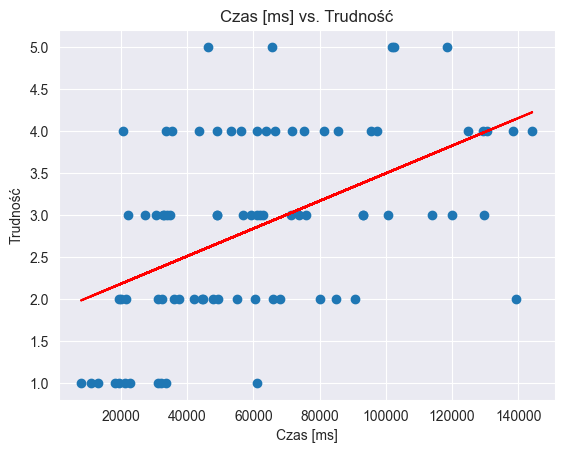

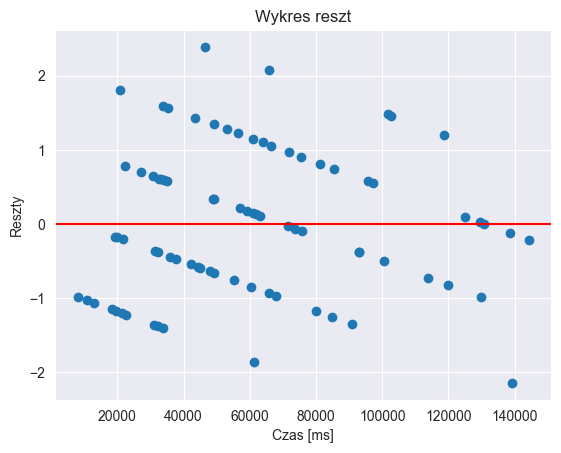

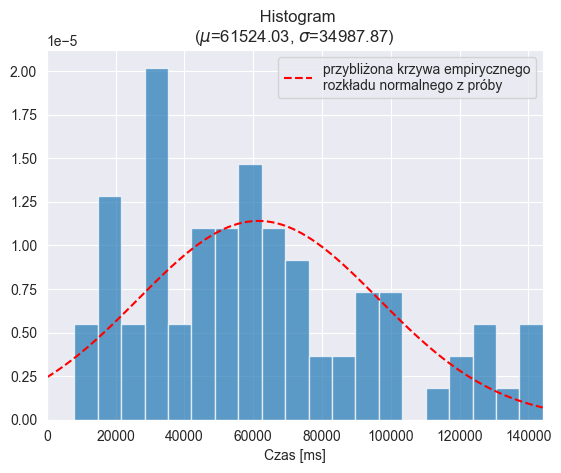

In [36]:
conduct_kruskal_wallis_test(df, ALPHA, 'czas', 'trudnosc')
create_scatterWithregression_and_residuals_plots(df, 'czas', 'trudnosc', 'Czas [ms]', 'Trudność')
create_histogram(df, '', 'czas', 'Czas [ms]')

#### Zadania 1a, 1b, 2a, 2b, 3a, 3b

In [37]:
df1a = pd.DataFrame({'czas': df_merge['Duration_1a'], 'trudnosc': df_merge['1a_trud']})
df2a = pd.DataFrame({'czas': df_merge['Duration_2a'], 'trudnosc': df_merge['2a_trud']})
df3a = pd.DataFrame({'czas': df_merge['Duration_3a'], 'trudnosc': df_merge['3a_trud']})

df1b = pd.DataFrame({'czas': df_merge['Duration_1b'],'trudnosc': df_merge['1b_trud']})
df2b = pd.DataFrame({'czas': df_merge['Duration_2b'], 'trudnosc': df_merge['2b_trud']})
df3b = pd.DataFrame({'czas': df_merge['Duration_3b'], 'trudnosc': df_merge['3b_trud']})

dfs = [df1a, df1b, df2a, df2b, df3a, df3b]
names = {
    1: '1a:',
    2: '1b:',
    3: '2a:',
    4: '2b:',
    5: '3a:',
    6: '3b:',
}

In [38]:
conduct_normality_test_for_many(dfs, names, 'czas', ALPHA)

-----------------------------------------------
1a:
Stats: 0.9164128303527832
P-value: 0.0059500802308321
Rozkład jest różny od normalnego.
-----------------------------------------------
1b:
Stats: 0.9273679256439209
P-value: 0.013227981515228748
Rozkład jest różny od normalnego.
-----------------------------------------------
2a:
Stats: 0.8683959245681763
P-value: 0.000259928114246577
Rozkład jest różny od normalnego.
-----------------------------------------------
2b:
Stats: 0.9549580812454224
P-value: 0.11238806694746017
Dane mają rozkład normalny.
-----------------------------------------------
3a:
Stats: 0.9572257995605469
P-value: 0.13453315198421478
Dane mają rozkład normalny.
-----------------------------------------------
3b:
Stats: 0.9545148611068726
P-value: 0.10850247740745544
Dane mają rozkład normalny.


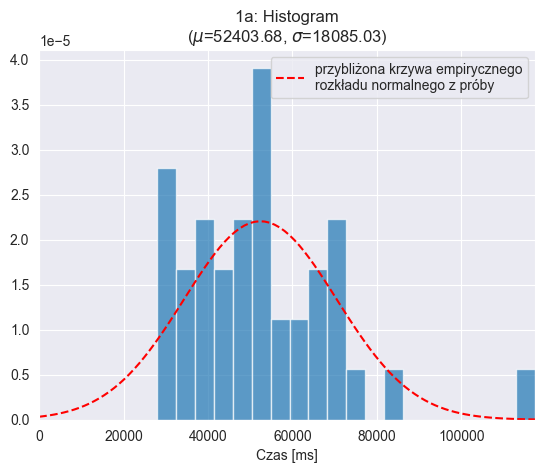

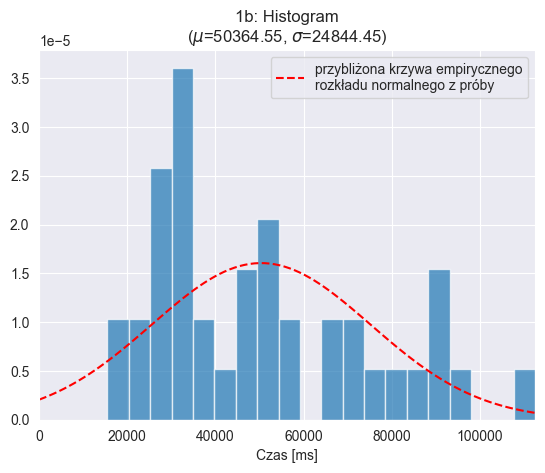

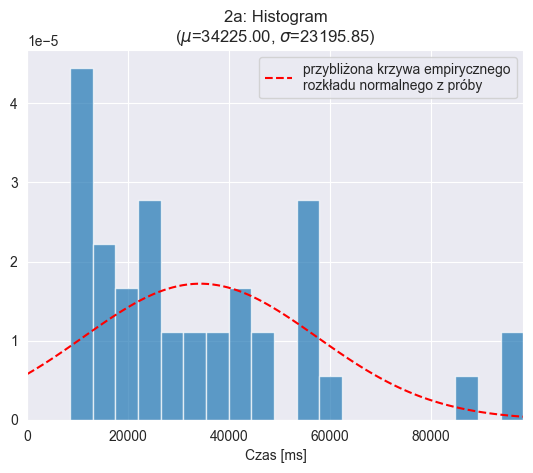

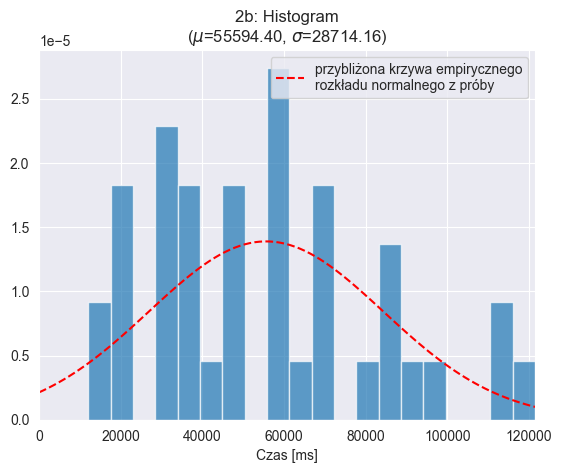

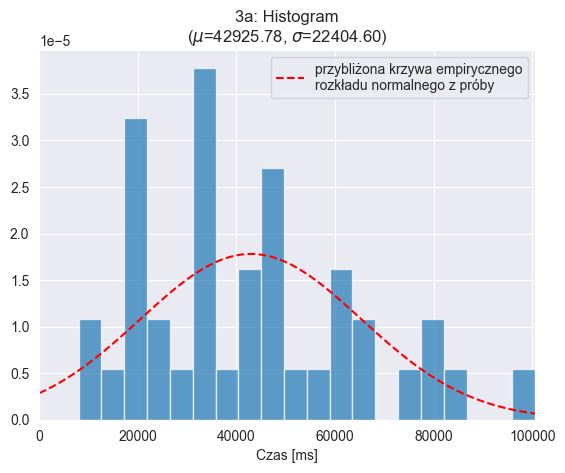

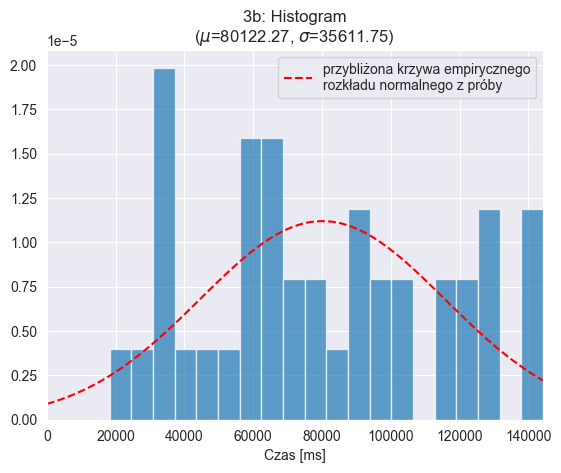

In [42]:
create_histogram_for_many(dfs, names, 'czas', 'Czas [ms]')

In [39]:
no_gauss = [df1a, df1b, df2a]
gauss = [df2b, df3a, df3b]

names_no_gauss = {
    1: '1a:',
    2: '1b:',
    3: '2a:',
}
names_gauss = {
    1: '2b:',
    2: '3a:',
    3: '3b:',
}

In [40]:
conduct_test_for_no_gaussian_variables_for_many(no_gauss, names_no_gauss, ALPHA, 'czas', 'trudnosc')

-----------------------------------------------
1a:
H: 8.033623693379809
p-value: 0.09035425169108957
Brak podstaw do odrzucenia H0.
-----------------------------------------------
1b:
H: 4.0427062026548555
p-value: 0.25688940452274556
Brak podstaw do odrzucenia H0.
-----------------------------------------------
2a:
H: 20.1917516629712
p-value: 0.0004576973780198644
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.


In [41]:
conduct_test_for_gaussian_variables_for_many(gauss, names_gauss, 'czas', 'trudnosc', ALPHA)

-----------------------------------------------
2b:
W: 0.9731271430788316
Homogeniczność wariancji zachowana.
F-value: 3.9245563400409433
p-value: 0.009800883434643113
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
-----------------------------------------------
3a:
W: 1.5301247458236718
Homogeniczność wariancji zachowana.
F-value: 4.248565091415587
p-value: 0.006596764886223408
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
-----------------------------------------------
3b:
W: 1.2429233770757295
Homogeniczność wariancji zachowana.
F-value: 2.873389780520085
p-value: 0.03700231037793992
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.


-------------------------------
1a:


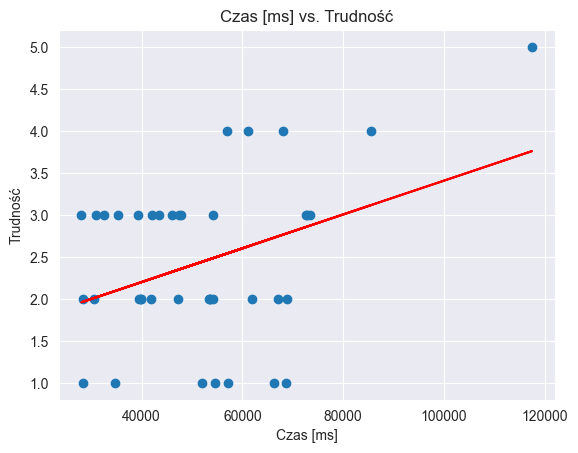

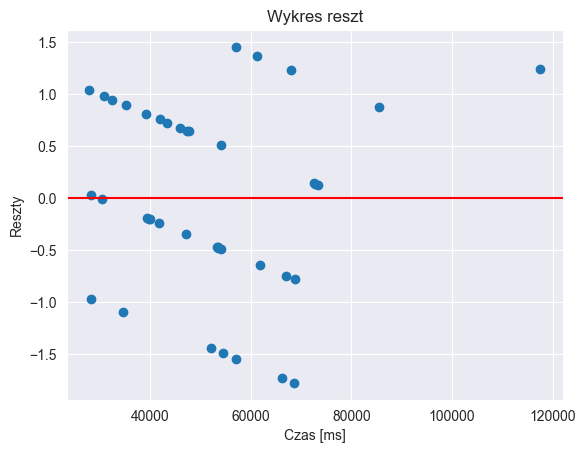

-------------------------------
1b:


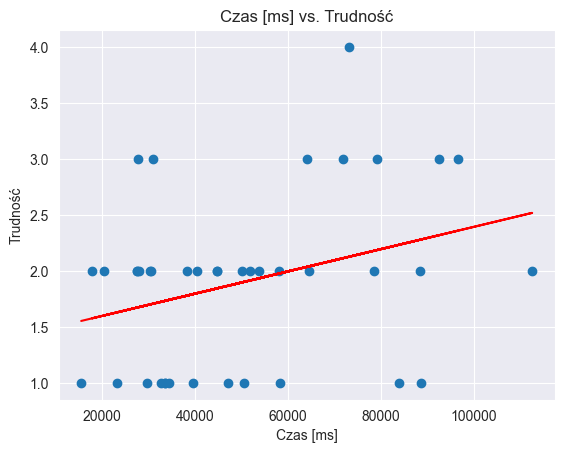

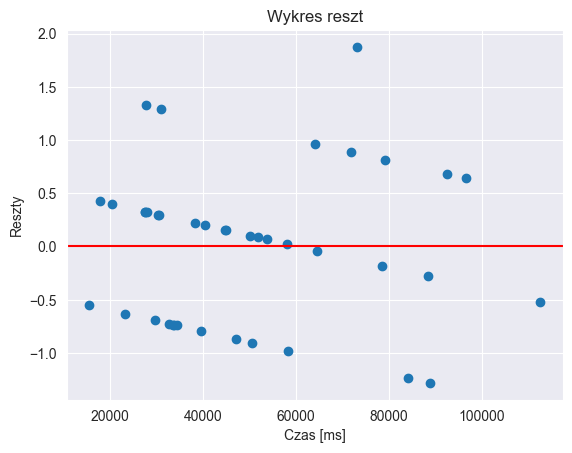

-------------------------------
2a:


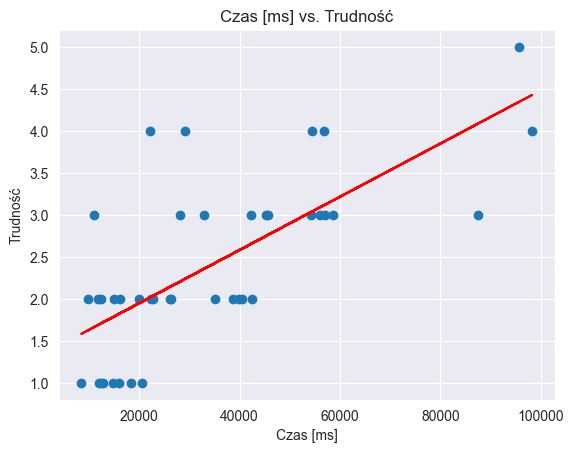

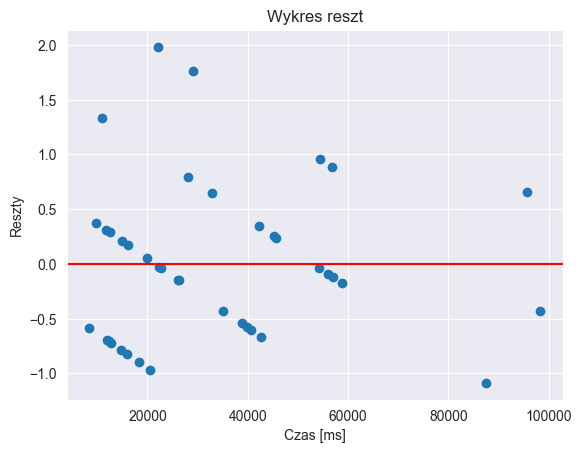

-------------------------------
2b:


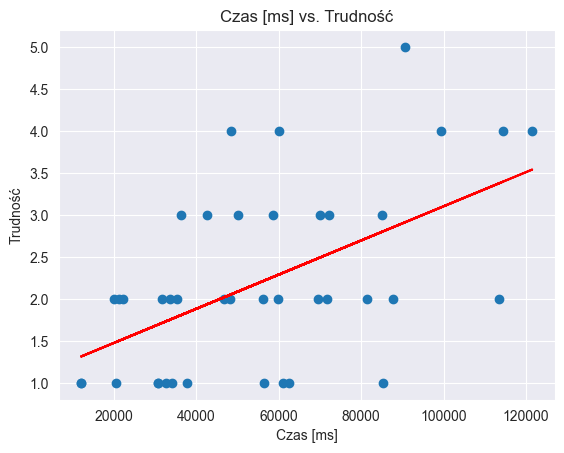

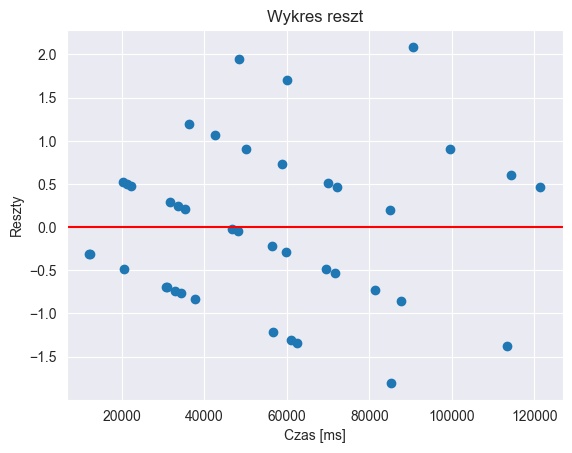

-------------------------------
3a:


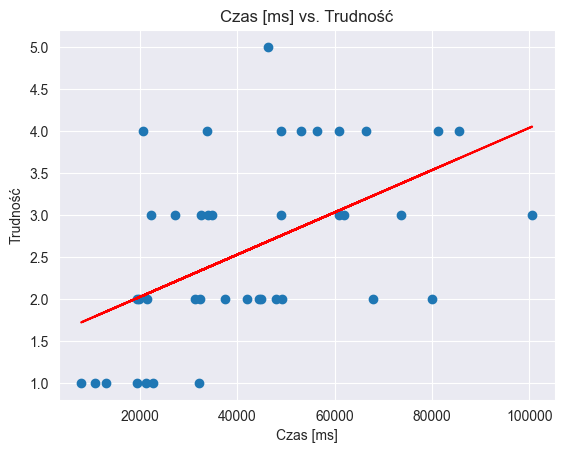

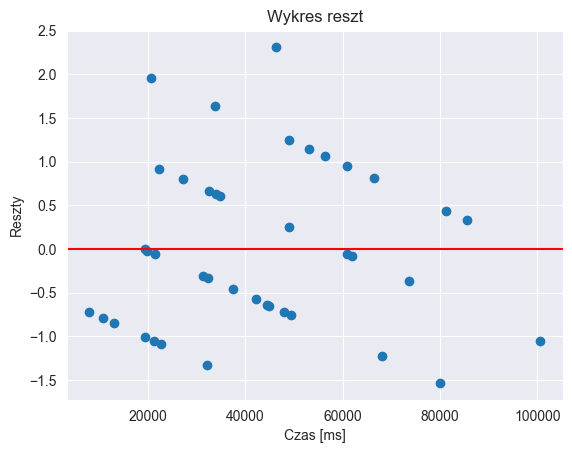

-------------------------------
3b:


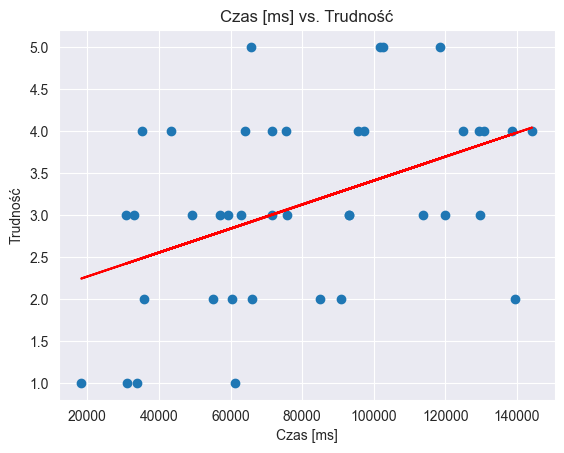

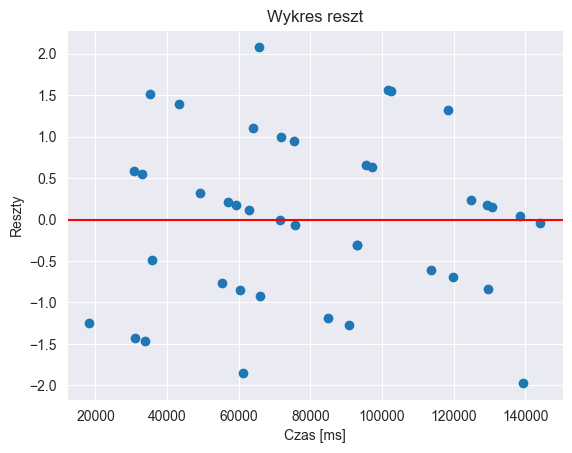

In [43]:
for i, df in enumerate(dfs):
    print('-------------------------------')
    print(names[i+1])
    create_scatterWithregression_and_residuals_plots(df, 'czas', 'trudnosc', 'Czas [ms]', 'Trudność')

### Podsumowanie:
Istnieje istotna statystycznie zależność między czasem odpowiedzi a trudnością zadania dla:
- zsumowane grafiki: 2, 3
- wszystkich grafik
- grafik A
- grafik B
- grafik 1,2,3
- grafik 2a,2b,3a,3b


Czas odpowiedzi wzrastał wraz ze wzrostem oceny trudności (dla wszystkich analizowanych przypadków poza 1a i 1b ten wzrost był istotny statystycznie).
